In [75]:
import numpy as np
# !pip install scikit-fuzzy
import skfuzzy as fuzz
import matplotlib.pyplot as plot

In [76]:
var_quality = np.arange(0,11,1)
var_service=np.arange(0,11,1)
var_tip = np.arange(0,26,1)

In [77]:
low_quality = fuzz.trimf(var_quality, [0,0,5])
medium_quality = fuzz.trimf(var_quality, [0,5,10])
high_quality = fuzz.trimf(var_quality, [5,10,10])

In [78]:
low_service = fuzz.trimf(var_service, [0,0,5])
medium_service = fuzz.trimf(var_service, [0,5,10])
high_service = fuzz.trimf(var_service, [5,10,10])

In [79]:
low_tip = fuzz.trimf(var_tip,[0,0,13])
medium_tip = fuzz.trimf(var_tip,[0,13,25])
high_tip = fuzz.trimf(var_tip,[13,25,25])

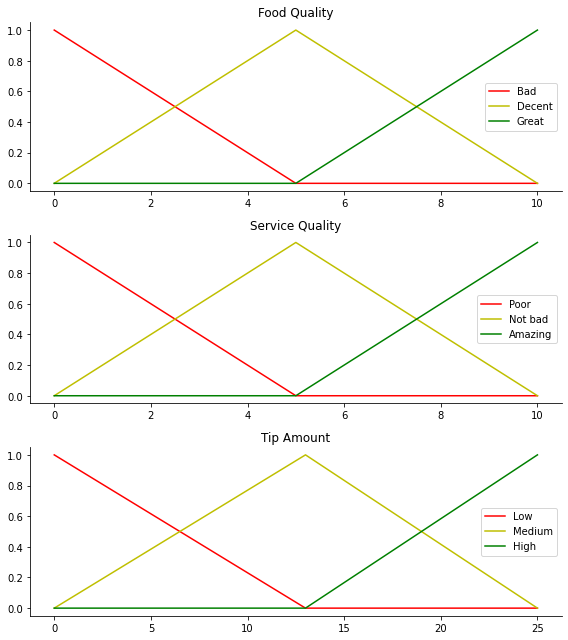

In [80]:
fig, (g_food, g_service, g_tip) = plot.subplots(nrows=3, figsize=(8, 9))

g_food.plot(var_quality, low_quality, 'r', linewidth=1.5, label='Bad')
g_food.plot(var_quality, medium_quality, 'y', linewidth=1.5, label='Decent')
g_food.plot(var_quality, high_quality, 'g', linewidth=1.5, label='Great')
g_food.set_title("Food Quality")
g_food.legend()

g_service.plot(var_service, low_service, 'r', linewidth=1.5, label='Poor')
g_service.plot(var_service, medium_service, 'y', linewidth=1.5, label='Not bad')
g_service.plot(var_service, high_service, 'g', linewidth=1.5, label='Amazing')
g_service.set_title("Service Quality")
g_service.legend()

g_tip.plot(var_tip, low_tip, 'r', linewidth=1.5, label='Low')
g_tip.plot(var_tip, medium_tip, 'y', linewidth=1.5, label='Medium')
g_tip.plot(var_tip, high_tip, 'g', linewidth=1.5, label='High')
g_tip.set_title("Tip Amount")
g_tip.legend()

for g in (g_food, g_service, g_tip):
  g.spines['top'].set_visible(False)
  g.spines['right'].set_visible(False)
  g.get_xaxis().tick_bottom()
  g.get_yaxis().tick_left()
plot.tight_layout()

In [81]:
Food_Quality, Service_Marks = 6.5, 9.8
Quality_Level_Low = fuzz.interp_membership(var_quality, low_quality, Food_Quality)
Quality_Level_Medium = fuzz.interp_membership(var_quality, medium_quality, Food_Quality)
Quality_Level_High = fuzz.interp_membership(var_quality, low_service, Food_Quality)

In [82]:
Service_Level_Low = fuzz.interp_membership(var_service, low_service, Service_Marks)
Service_Level_Medium = fuzz.interp_membership(var_service, medium_service, Service_Marks)
Service_Level_High = fuzz.interp_membership(var_service, high_service, Service_Marks)

In [97]:
Tip_Activation_Low = np.fmin(np.fmax(Quality_Level_Low, Service_Level_Low), low_tip)
Tip_Activation_Medium = np.fmin(Service_Level_Medium, medium_tip)
Tip_Activation_High = np.fmin(np.fmax(Quality_Level_High, Service_Level_Low), medium_tip)
tipZero = np.zeros_like(var_tip)

Text(0.5, 1.0, 'Output Membership Activity')

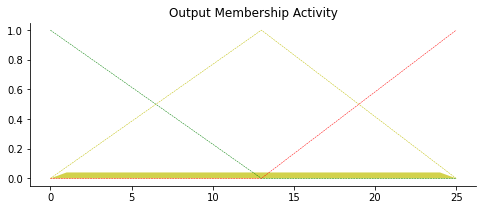

In [84]:
fig, g_final = plot.subplots(figsize=(8,3))
g_final.fill_between(var_tip, tipZero, Tip_Activation_Low, facecolor="g", alpha=0.7)
g_final.plot(var_tip, low_tip, "g", linewidth=0.5, linestyle="--")

g_final.fill_between(var_tip, tipZero, Tip_Activation_Medium, facecolor="y", alpha=0.7)
g_final.plot(var_tip, medium_tip, "y", linewidth=0.5, linestyle="--")

g_final.fill_between(var_tip, tipZero, Tip_Activation_High, facecolor="r", alpha=0.7)
g_final.plot(var_tip, high_tip, "r", linewidth=0.5, linestyle="--")

g_final.spines['top'].set_visible(False)
g_final.spines['right'].set_visible(False)
g_final.get_xaxis().tick_bottom()
g_final.get_yaxis().tick_left()

g_final.set_title("Output Membership Activity")